In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(16,8)})
sns.set()


import sys
import os
sys.path.append("../src/")
from qite import *
from qlanczos import *

# Nmax=2

-2.091340375761212


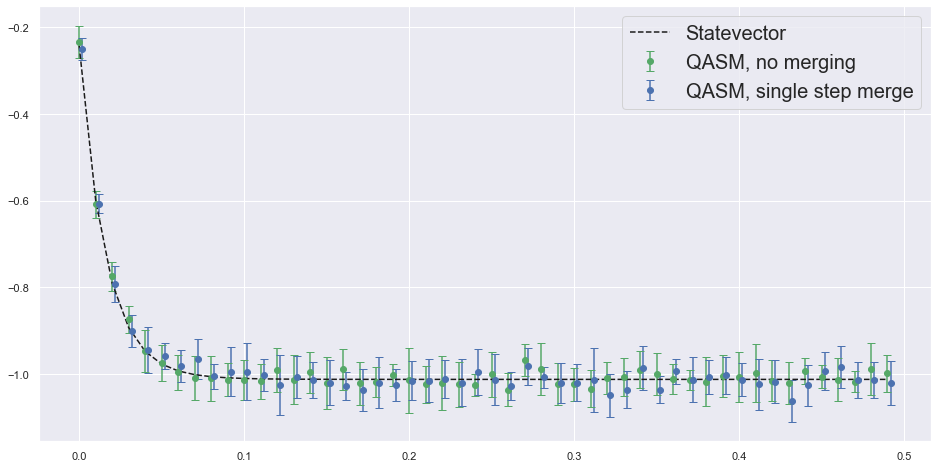

In [21]:

results_filename='../qite_results_Nmax02_N4LOsrg1.5_graycode_qasm.npy'
averages_qasm,stdevs_qasm=analyze_qite_results(results_filename)

results_filename='../qite_results_Nmax02_N4LOsrg1.5_graycode_statevector.npy'
averages_sv,_=analyze_qite_results(results_filename)

results_filename="../qite_results_Nmax02_N4LOsrg1.5_graycode_qasm_ms1.npy"
averages_qasm_m1,stdevs_qasm_m1=analyze_qite_results(results_filename)

time=[0.01*t for t in range(len(averages_sv))]
time_shifted=[0.01*t+.002 for t in range(len(averages_sv))]
plt.errorbar(time, averages_qasm, yerr=stdevs_qasm, capsize=4, fmt='go',label="QASM, no merging")
plt.errorbar(time_shifted, averages_qasm_m1, yerr=stdevs_qasm_m1, capsize=4, fmt='bo',label="QASM, single step merge")
plt.plot(time,averages_sv,"k--",label="Statevector")
plt.legend(prop={'size': 20})

In [8]:
print(np.mean(stdevs_qasm))
print(np.mean(stdevs_qasm_m1))

0.044473954629621074
0.04485952537377202


No handles with labels found to put in legend.


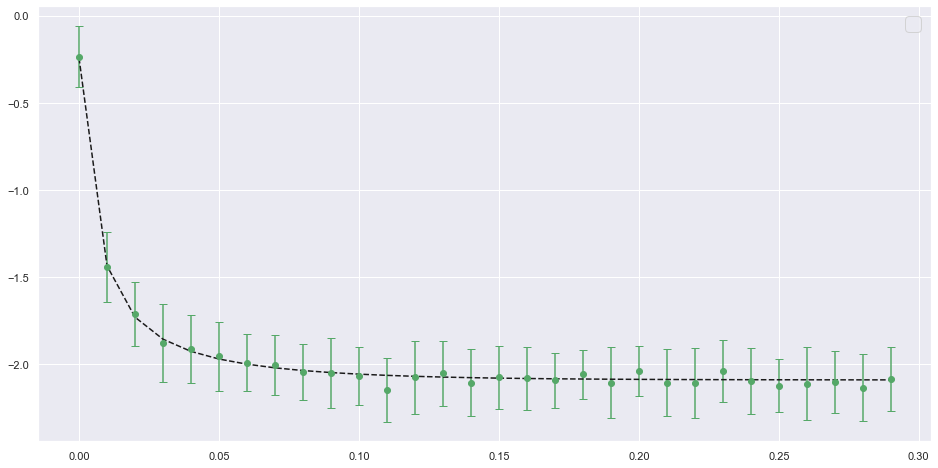

In [17]:
results_filename="../qite_results_Nmax06_N4LOsrg1.5_graycode_qasm_ms1.npy"
averages_qasm_Nmax6_m1,stdevs_qasm_Nmax6_m1=analyze_qite_results(results_filename)
time=[0.01*t for t in range(len(averages_qasm_Nmax6_m1))]

results_filename="../qite_results_Nmax06_N4LOsrg1.5_graycode_statevector_ms1.npy"
averages_sv_Nmax6_m1,_=analyze_qite_results(results_filename)


plt.errorbar(time, averages_qasm_Nmax6_m1, yerr=stdevs_qasm_Nmax6_m1, capsize=4, fmt='go')
plt.plot(time,averages_sv_Nmax6_m1[:30],"k--")


In [3]:
qlanczos_results_filename='../qlanczos_results_Nmax06_N4LOsrg1.5_graycode_qasm_ms1.npy'
results=np.load(qlanczos_results_filename,allow_pickle=True)
# print(results)
# for result in results:
#     print(result)

-11.84715 killed
-2.70302 killed
-2.37741 killed


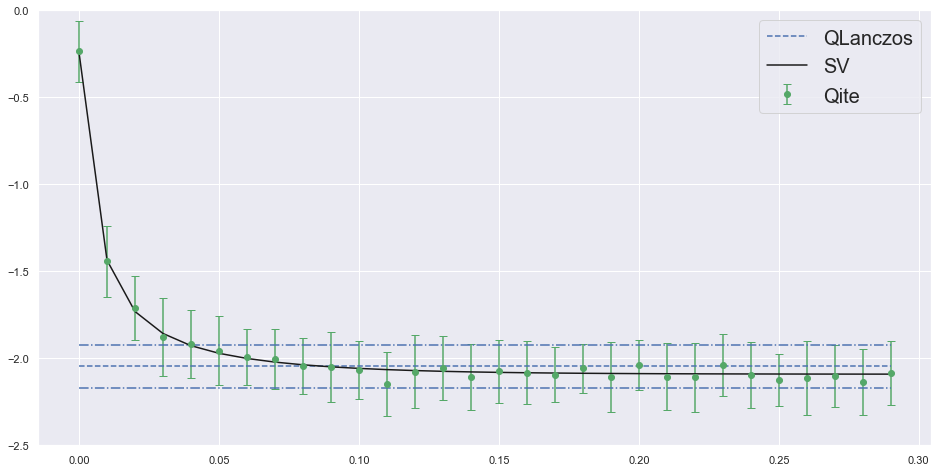

In [4]:
results_filename='../qite_results_Nmax06_N4LOsrg1.5_graycode_qasm_ms1.npy'
averages_qasm,stdevs_qasm=analyze_qite_results(results_filename)

qlanczos_results_filename='../qlanczos_results_Nmax06_N4LOsrg1.5_graycode_qasm_ms1.npy'
ql_mean,ql_std=analyze_qlanczos_results(qlanczos_results_filename)


results_filename='../qite_results_Nmax06_N4LOsrg1.5_graycode_statevector_ms1.npy'
averages_sv,stdevs_sv=analyze_qite_results(results_filename)


plot_ql_mean=[ql_mean for t in range(len(averages_qasm))]
plot_qlp=[ql_mean+ql_std for t in range(len(averages_qasm))]
plot_qlm=[ql_mean-ql_std for t in range(len(averages_qasm))]

time=[0.01*t for t in range(len(averages_qasm))]
plt.errorbar(time, averages_qasm, yerr=stdevs_qasm, capsize=4, fmt='go',label="Qite")
plt.plot(time,plot_ql_mean,"b--",label="QLanczos")
plt.plot(time,plot_qlp,"b-.")
plt.plot(time,plot_qlm,"b-.")

plt.plot(time,averages_sv[:30],"k-",label="SV")
plt.ylim(-2.5,-0.0)
plt.legend(prop={'size': 20})




In [8]:
H = hamiltonian_matrix(Nmax=6,J=1,interaction="N4LOsrg1.5")
exact_eigenvalue,_=eigh(H)
print(H.size)
print(exact_eigenvalue[0])

print(averages_sv)

49
-2.091340375761212
[-0.2426     -1.43639123 -1.73094104 -1.85725072 -1.92726525 -1.97110406
 -2.00068216 -2.02170335 -2.03719842 -2.04890924 -2.05790972 -2.06490482
 -2.07038213 -2.07469284 -2.0780975  -2.08079349 -2.08293245 -2.08463203
 -2.08598416 -2.08706098 -2.08791932 -2.08860403 -2.08915063 -2.08958725
 -2.08993622 -2.09021529 -2.09043856 -2.09061728 -2.09076038 -2.09087503
 -2.0909669  -2.09104054 -2.09109959 -2.09114696 -2.09118496 -2.09121546
 -2.09123994 -2.0912596  -2.09127538 -2.09128806 -2.09129824 -2.09130643
 -2.09131301 -2.09131829 -2.09132255 -2.09132596 -2.09132872 -2.09133093
 -2.09133271 -2.09133414]
